In [1]:
# Formação Cientista de Dados - Fernando Amaral e Jones Granatyr
# Deep Learning

In [2]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
#pip install tensorflow (executar no Anaconda Prompt)

2022-05-01 12:44:59.389983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-01 12:44:59.390009: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


11501568/11490434 [==============================] - 4s 0us/step


Text(0.5, 1.0, '0')

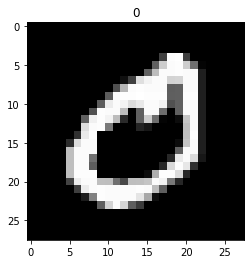

In [3]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

In [4]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [5]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [6]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [7]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [8]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

2022-05-01 12:45:28.675388: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-01 12:45:28.675481: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-01 12:45:28.675546: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nt-luciano): /proc/driver/nvidia/version does not exist
2022-05-01 12:45:28.676158: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# Visualização da estrutura da rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [10]:
# Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
# Na variável historico temos os histórico das execuções (erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

Epoch 1/20


2022-05-01 12:45:39.914363: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1869/1875 [============================>.] - ETA: 0s - loss: 0.4452 - accuracy: 0.8659

2022-05-01 12:45:43.985853: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4443 - accuracy: 0.8662 - val_loss: 0.1697 - val_accuracy: 0.9479
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2288 - accuracy: 0.9333 - val_loss: 0.1230 - val_accuracy: 0.9636
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1882 - accuracy: 0.9462 - val_loss: 0.1141 - val_accuracy: 0.9652
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1689 - accuracy: 0.9520 - val_loss: 0.1047 - val_accuracy: 0.9689
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1479 - accuracy: 0.9563 - val_loss: 0.0975 - val_accuracy: 0.9706
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1420 - accuracy: 0.9589 - val_loss: 0.0958 - val_accuracy: 0.9715
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1341 - accuracy: 0.9607 - val_loss: 0.0851 - val_accuracy: 0.9749
Epo

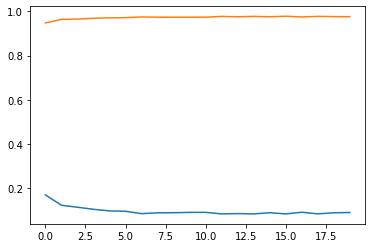

In [11]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
#performance da rede
plt.plot(historico.history['val_accuracy'])

In [12]:
# Obtenção das previsões 
previsoes = modelo.predict(X_teste)
previsoes

2022-05-01 12:47:09.226774: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


array([[1.86069642e-14, 3.04472593e-07, 4.64991501e-07, ...,
        9.99995828e-01, 9.77586415e-11, 6.59412990e-07],
       [8.89033402e-07, 1.43263071e-06, 9.99991655e-01, ...,
        1.67188034e-07, 5.29133937e-09, 9.37366764e-12],
       [6.59454880e-10, 9.99976039e-01, 2.08568254e-05, ...,
        2.37548738e-06, 3.58438086e-07, 2.16958868e-10],
       ...,
       [3.00527745e-12, 2.07655870e-09, 5.11014919e-09, ...,
        1.13712959e-08, 4.28466512e-10, 6.20388647e-08],
       [2.41613340e-10, 1.01364264e-10, 1.15557286e-11, ...,
        3.80362219e-13, 3.00741543e-09, 8.21383705e-14],
       [3.38677518e-13, 3.19066878e-19, 4.61173864e-14, ...,
        6.02020313e-21, 1.97218387e-16, 2.61048623e-17]], dtype=float32)

In [13]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 967,    1,    2,    0,    0,    0,    4,    2,    2,    2],
       [   0, 1128,    3,    1,    0,    1,    2,    0,    0,    0],
       [   3,    1, 1015,    2,    2,    0,    1,    6,    2,    0],
       [   1,    3,    7,  986,    0,    6,    0,    3,    4,    0],
       [   0,    1,    3,    0,  961,    1,    8,    2,    1,    5],
       [   4,    2,    0,   12,    1,  860,    7,    1,    3,    2],
       [   4,    3,    0,    1,    3,    2,  945,    0,    0,    0],
       [   1,    5,   11,    3,    0,    0,    0, 1000,    3,    5],
       [   7,    4,    5,    1,    4,    7,    4,    5,  934,    3],
       [   4,    7,    0,    9,   12,    2,    1,    6,    6,  962]])

In [14]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
#número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

[4]